# Part 0: Regular expressions
## Exercises: Regular expressions round 1.

#### Now, explain in your own words: what are regular expressions?
Regular expressions are sequence of characters that are used to identify patterns in a text.

#### Provide an example of a regex to match 4 digits numbers (by this, I mean precisely 4 digits, you should not match any part of numbers with e.g. 5 digits). In your notebook, use findall to show that your regex works on this [test-text](https://raw.githubusercontent.com/suneman/socialgraphs2016/master/files/test.txt). Hint: a great place to test out regular expressions is: https://regex101.com.

In [2]:
import re

f = open('test.txt', 'r')
strings = re.findall(r'\d\d\d\d', f.read())
print(strings)

['1234', '9999', '2345']


#### Provide an example of a regex to match words starting with "super". Show that it works on the [test-text](https://raw.githubusercontent.com/suneman/socialgraphs2016/master/files/test.txt).

In [3]:
f = open('test.txt', 'r')
strings = re.findall(r'super\w+', f.read())
print(strings)

['superpolaroid', 'supertaxidermy', 'superbeer']


#### Exercise: Regular expressions round 2. Show that you can extract the wiki-links from the [test-text](https://raw.githubusercontent.com/suneman/socialgraphs2016/master/files/test.txt). Perhaps you can find inspiration on stack overflow or similar.

In [4]:
f = open('test.txt', 'r')
strings = re.findall(r'\[\[(.*?)\]', f.read())
print(strings)

['drinking vinegar', 'gentrify', 'hashtag', 'Bicycle|Bicycle(two-wheeled type)', 'Pitchfork|Pitchfork Magazine']


# Part A: Download Philosopher-pages from Wikipedia
#### Exercise: Find the names of all the philosopher-pages, download and analyze them.

[This wiki-page](https://en.wikipedia.org/wiki/Lists_of_philosophers) contains list of philosophers from various branches of philosophy:
1. [aestheticians](https://en.wikipedia.org/wiki/List_of_aestheticians)
2. [epistemologists](https://en.wikipedia.org/wiki/List_of_epistemologists)
3. [ethicists](https://en.wikipedia.org/wiki/List_of_ethicists)
4. [logicians](https://en.wikipedia.org/wiki/List_of_logicians)
5. [metaphysicians](https://en.wikipedia.org/wiki/List_of_metaphysicians)
6. [social and political philosophers](https://en.wikipedia.org/wiki/List_of_social_and_political_philosophers)

We're going to have to go and extract the page names for all six groups of philosophers. Unfortunately wikipedia does not have a uniform way of setting such pages up, so you'll have to do each page differently. And I'd like you to maintain **seven** (7) separate lists of philosophers. One for each branch of philosophy - and one combined list of all philosophers.

Let's put together some descriptive statistics:

* How many philosophers in each list? How many total?
* Which is the largest branch of philosophy?

In [5]:
import io
import re

branches_of_phi = ['aestheticians', 'epistemologists',
                   'ethicists', 'logicians', 'metaphysicians',
                   'social_and_political_philosophers']

total_phi = 0
num_in_phi = []
for phi in branches_of_phi:
    f = io.open('./wikitext_' + phi + '.txt', 'r', encoding='utf8')
    branch_of_phi = re.findall(r'\[\[(.*?)\]\]', f.read())
    print(phi + ': ' + str(len(branch_of_phi)))
    num_in_phi.append(len(branch_of_phi))
    total_phi = total_phi + len(branch_of_phi)

print('Total: ' + str(total_phi))

largest_branch = max(xrange(len(num_in_phi)), key = lambda x: num_in_phi[x])
print('Largest branch: ' + branches_of_phi[largest_branch])

aestheticians: 126
epistemologists: 99
ethicists: 272
logicians: 273
metaphysicians: 96
social_and_political_philosophers: 295
Total: 1161
Largest branch: social_and_political_philosophers


* Are some philosophers in more than one list?

In [6]:
all_phi = []
for phi in branches_of_phi:
    f = io.open('./wikitext_' + phi + '.txt', 'r', encoding='utf8')
    branch_of_phi = re.findall(r'\[\[(.*?)\]\]', f.read())
    all_phi = all_phi + branch_of_phi

phi_duplicates = set([x for x in all_phi if all_phi.count(x) > 1])

print('Philosophers in more than one list: ' + str(len(phi_duplicates)))

Philosophers in more than one list: 115


* Which philosopher is in most lists & and how many?

In [7]:
# Find how often philosophers appear in the combined list
# and create a list how often they appear
all_phi_num = []
for i in all_phi:
    all_phi_num.append(all_phi.count(i))

# Find philosopher(s) who is/are in most lists by using
# the max-value of the prev. list and create a new list
find_most_phi = []
for i in range(len(all_phi_num)):
    if (all_phi_num[i] == max(all_phi_num)):
        find_most_phi.append(all_phi[i])

# Deleting duplicates from prev. list and sort
most_phi = sorted(set(find_most_phi))      

# Printing out the most philosopher(s)
for phi in most_phi:
    print(phi + ' is in ' + str(max(all_phi_num)) + ' lists')

Aristotle is in 6 lists
Thomas Aquinas is in 6 lists


* Let's investigate philosophers active in multiple sub-fields. Create a list of every philosopher that occurs in more than one list. Use Python to sort the list according to how many lists each philosopher belongs to (so the guy you found in the previous question is first in that list).

In [8]:
# Combining two lists (all_phi_num and all_phi) into one list
if (len(all_phi) == len(all_phi_num)):
    all_phi_two = zip(all_phi, all_phi_num)
else:
    print('Lists are not of the same length')

# Deleting duplicates from prev. list
more_phi = set(all_phi_two)

# Sort the list according to how often the philosophers appear
sorted_by_num = sorted(more_phi, key=lambda tup: tup[1], reverse=True)

# Printing out philosophers that appear in more than one list
for phi_two in sorted_by_num:
    if (phi_two[1] > 1):
        print(phi_two[0] + ' is in ' + str(phi_two[1]) + ' lists')

Aristotle is in 6 lists
Thomas Aquinas is in 6 lists
Bertrand Russell is in 5 lists
Plato is in 5 lists
Immanuel Kant is in 5 lists
Ayn Rand is in 4 lists
Judith Butler is in 3 lists
Ruth Barcan Marcus is in 3 lists
David Hume is in 3 lists
John Locke is in 3 lists
Mario Bunge is in 3 lists
Søren Kierkegaard is in 3 lists
Susan Haack is in 3 lists
Ludwig Wittgenstein is in 3 lists
John Stuart Mill is in 3 lists
Nelson Goodman is in 3 lists
Arthur Schopenhauer is in 3 lists
Georg Wilhelm Friedrich Hegel is in 3 lists
Penelope Maddy is in 2 lists
John Hospers is in 2 lists
Noam Chomsky is in 2 lists
Baruch Spinoza is in 2 lists
Kit Fine is in 2 lists
Lorenzo Peña is in 2 lists
Constantin Rădulescu-Motru is in 2 lists
Max Stirner is in 2 lists
Giambattista Vico is in 2 lists
Karl Wilhelm Friedrich von Schlegel is in 2 lists
Murray Bookchin is in 2 lists
Gilbert Harman is in 2 lists
Herbert Spencer is in 2 lists
Abraham Joshua Heschel is in 2 lists
Murray Rothbard is in 2 lists
Saul Kripke

#### Exercise: Find the names of all the philosopher-pages, download and analyze them.

Exercise: Download wikipages and save them to your own computer. For each of the philosophers in the combined list obtained in the previous exercise, use Wikipedia's API to download the full page content (using python) and save it (get it in json format, AND **don't** get the html version of the page which is much more difficult to parse).

* Some pages contain unicode characters, so we recommend you save the files using the io.open method with utf-8 encoding
* Some philosopher names have spaces. As a first stab, try to simply substitute spaces with underscores. (E.g. https://en.wikipedia.org/wiki/Thomas_Aquinas from Thomas Aquinas. If that doesn't work, you can construct the api-url using urllib.quote (or similar). This is another way of handling spaces using and other non-ascii characters in urls using [url encoding](http://www.w3schools.com/tags/ref_urlencode.asp).
* Store the content of all pages. It's up to you how to do this. One strategy is to use Python's built in pickle format. Or you can simply write the content of wiki-pages to text files and store those in a folder on your computer. I'm sure there are other ways. It's crucial that you store them in a way that's easy to access, since we'll use these pages a lot throughout the remainder of the course (so you don't want to retrieve them from wikipedia every time).

In [1]:
import urllib2
import json

# Function for retrieving json data from Wikipedia
def jsonWiki( name ):
    # Parameters for retrieving page from wikipedia
    baseurl = 'https://en.wikipedia.org/w/api.php?'
    action = "action=query"
    title = "titles=" + name
    content = "prop=revisions&rvprop=content"
    dataformat = "format=json"

    # Construct the query
    query = "%s%s&%s&%s&%s" % (baseurl, action, title, content, dataformat)

    # Download json format of wikipedia page
    wikiresponse = urllib2.urlopen(query)
    wikisource = wikiresponse.read()
    wikijson = json.loads(wikisource)
    
    return wikijson

In [10]:
# Go through the list of philosophers and download their respective pages
for p in range(len(sorted_by_num)):
    #Convert philosophers' names from utf8 to string
    name = sorted_by_num[p][0].encode("utf-8")
    
    # Whitespace changed to underscore
    name_url = re.sub('\s+', '_', name)
    
    with io.open('./philosophers_json/' + name_url + '.json', 'w', encoding='utf8') as json_file:
        json_file.write(unicode(json.dumps(jsonWiki(name_url), ensure_ascii=False)))

# Part B: Building the networks
Now, we're going to build a NetworkX directed graph of the links between pages. For each philosopher page, we'll find all the links to other characters, and for each link add an edge in the graph.

Exercise: Build the philosopher network. The **combined list** from above provides the network nodes. We will use info from the pages to define links. Every time philosopher A's page links to philosopher B's page, we create a directed link from A to B. There are many ways to do this, but below, I've tried to break it down into natural steps.

* Use a regular expression to extract all outgoing links from each of the pages you downloaded above. There are many ways to iterate over pages - feel free to choose the one that matches the way you've chosen to store the pages.
* For each link you extract, check if the target is in the list you generated above. If yes, keep it. If no, discard it.
* Use a NetworkX [DiGraph](http://networkx.lanl.gov/reference/classes.digraph.html) to store the network.

In [10]:
import networkx as nx

P = nx.DiGraph()

# Go through list of philosophers and add notes to P for every philosopher
for pp in range(len(sorted_by_num)):
    P.add_node(sorted_by_num[pp][0])

In [11]:
# Go through list of philosophers and find links
for pp in range(len(sorted_by_num)): 
    # Whitespace changed to underscore
    namePhi_url = re.sub('\s+', '_', sorted_by_num[pp][0])
    
    f = io.open('./philosophers_json/' + namePhi_url + '.json', 'r', encoding='utf8')
    phi_link = re.findall(r'\[\[(.*?)\]\]', f.read())
    
    # Add directed link from philosopher A to philosopher B 
    for ppp in range(len(sorted_by_num)):
        if (sorted_by_num[ppp][0] in phi_link):
            P.add_edge(sorted_by_num[pp][0], sorted_by_num[ppp][0])
            # print(sorted_by_num[pp][0] + ' links to ' + sorted_by_num[ppp][0])

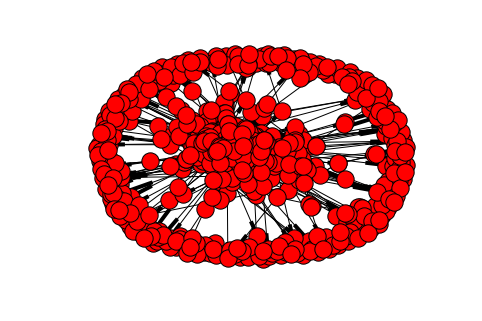

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

nx.draw(P)

# Part C: Analyzing the networks
Now that we have the network, it's time to do a preliminary analysis of it (we'll go more in depth next time).
### Exercise: Begin to analyze the philosopher network.

**Why do you think we want to use a directed graph? Could have we used an undirected graph instead?**

The reason for that is that it matters if page A links to page B, or page B links to page A or both link to each other. If we use undirected graphs we cannot tell that difference. If many philosophers link to on philosopher, he then must be important in some way and directed graphs illustrate that.

* What is the total number of nodes in the network? What is the total number of links? What's the average degree? What's the median degree?

In [13]:
import numpy

# Number of nodes in P
numOfNodes = P.number_of_nodes()
print('Number of nodes in P: ' + str(numOfNodes))

# Number of links in P
numOfLinks = P.number_of_edges()
print('Number of links in P: ' + str(numOfLinks))

# Average degree of P
avgDegree = float(numOfLinks) / float(numOfNodes)
print('Average degree of P: ' + str(avgDegree))

# Median degree of P
nodesDegrees = []
for i in range(len(sorted_by_num)):
    nodesDegrees.append(P.degree(sorted_by_num[i][0]))
print('Median degree of P: ' + str(numpy.median(nodesDegrees)))

Number of nodes in P: 1015
Number of links in P: 3528
Average degree of P: 3.47586206897
Median degree of P: 3.0


* List the top 10 philosophers by in-degree and out-degree.

In [14]:
# In-degrees and out-degrees of P
inDegrees = []
outDegrees = []
for i in range(len(sorted_by_num)):
    inDegrees.append(P.in_degree(sorted_by_num[i][0]))
    outDegrees.append(P.out_degree(sorted_by_num[i][0]))
    
# Unzip list 'sorted_by_num' to only get the names
names, num = zip(*sorted_by_num)

# Combining three lists (names, in-degrees, out-degrees) into one
InOutDegrees = zip(names, inDegrees, outDegrees)

In [15]:
# Print top 10 in in-degrees and their names
# Sort by in-degrees
inDegreesSort = sorted(InOutDegrees, key=lambda tup: tup[1], reverse=True)

# Getting the first 10 in the list
TopInDegrees = inDegreesSort[0:10]

for i in TopInDegrees:
    print(i[0] + ' has ' + str(i[1]) + ' in-degrees')

Aristotle has 116 in-degrees
Plato has 87 in-degrees
Bertrand Russell has 78 in-degrees
Immanuel Kant has 77 in-degrees
Karl Marx has 60 in-degrees
Ludwig Wittgenstein has 53 in-degrees
David Hume has 49 in-degrees
John Stuart Mill has 47 in-degrees
Friedrich Nietzsche has 44 in-degrees
John Locke has 39 in-degrees


In [16]:
# Print top 10 in out-degrees and their names
# Sort by out-degrees
outDegreesSort = sorted(InOutDegrees, key=lambda tup: tup[2], reverse=True)

# Getting the first 10 in the list
TopOutDegrees = outDegreesSort[0:10]

for i in TopOutDegrees:
    print(i[0] + ' has ' + str(i[2]) + ' out-degrees')

Bertrand Russell has 38 out-degrees
Martin Heidegger has 35 out-degrees
Georg Wilhelm Friedrich Hegel has 34 out-degrees
David Hume has 32 out-degrees
Friedrich Nietzsche has 29 out-degrees
Ludwig Wittgenstein has 27 out-degrees
Michel Foucault has 27 out-degrees
Plato has 26 out-degrees
Søren Kierkegaard has 26 out-degrees
Alfred North Whitehead has 26 out-degrees


* What is the interpretation of in-degree and out-degree in this case? Have you heard about these philosophers before?

The philosophers who have the most in-degrees are simply the oldest. Philosophers are basing their work on their previous work. Aristotle and Plato are at the top, as they were among the first philosophers.

The philosophers that have the most out-degrees are influenced by many philosophers or are collaborating with many.

I have heard about: Aristotle, Plato, Karl Marx, Friedrich Nietzsche and John Locke.

* Plot the distribution of in-degrees and out-degrees, binned using numpy.histogram. What is the most common degree?

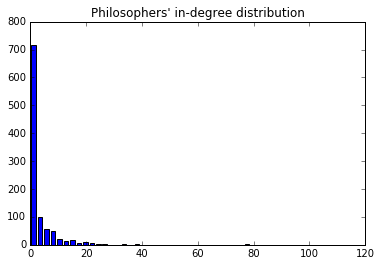

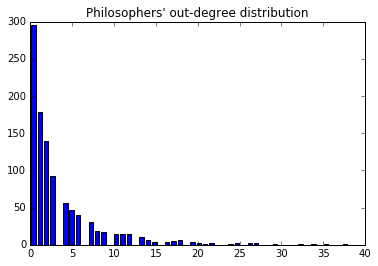

In [17]:
# in-degrees distribution
hist, bins = numpy.histogram(P.in_degree().values(), bins=50)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.title("Philosophers' in-degree distribution")
plt.show()

# out-degrees distribution
hist, bins = numpy.histogram(P.out_degree().values(), bins=50)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.title("Philosophers' out-degree distribution")
plt.show()

The most common degree is zero. Many philosophers' Wikipedia pages are not linking to another philosophers' Wikipedia pages.

* Plot the distribution of in-degrees and out-degrees one more time, this time plotted loglog scale.

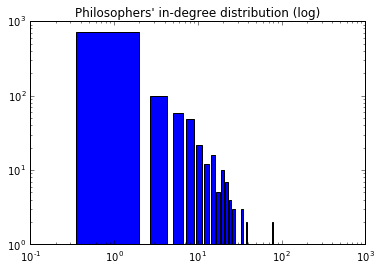

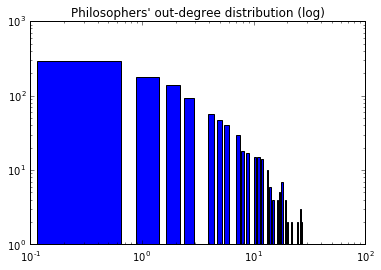

In [18]:
# in-degrees distribution (log)
hist, bins = numpy.histogram(P.in_degree().values(), bins=50)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.gca().set_xscale('log')
plt.gca().set_yscale('log')
plt.title("Philosophers' in-degree distribution (log)")
plt.show()

# out-degrees distribution (log)
hist, bins = numpy.histogram(P.out_degree().values(), bins=50)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.gca().set_xscale('log')
plt.gca().set_yscale('log')
plt.title("Philosophers' out-degree distribution (log)")
plt.show()

* Describe the distributions (as you would in a well written figure caption). Do they look Poissonian? Power-law? Something in between?

This a power-law distribution. Needs more text and explanation...

* Plot a scatter plot of the the in- versus out- degree for all philosophers using a loglog scale.

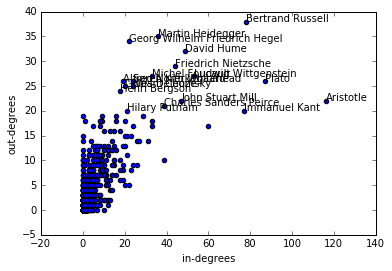

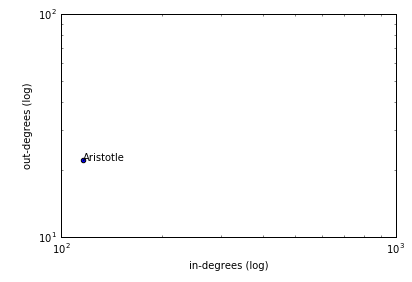

In [19]:
# Unzip list 'InOutDegrees'
nodes, inD, outD = zip(*InOutDegrees)

z = inD # in-degrees
y = outD # out-degrees
n = nodes

# Scatter plot - normal
fig, ax = plt.subplots()
ax.scatter(z, y)

for i, txt in enumerate(n):
    # Only show names of those who have more than 20 in- and out-degrees
    if ((z[i] and y[i]) >= 20):
        ax.annotate(txt, (z[i], y[i]))

plt.xlabel('in-degrees')
plt.ylabel('out-degrees')
plt.show()

# Scatter plot - log
fig, ax = plt.subplots()
ax.scatter(z, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i], y[i]))

plt.gca().set_xscale('log')
plt.gca().set_yscale('log')
plt.xlabel('in-degrees (log)')
plt.ylabel('out-degrees (log)')
plt.show()

* Comment on the relation between the two.

**Needs an answer...**